# Comparing Dask and Spark

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Read Data

In [2]:
dask_kmeans = pd.read_csv('dask_kmeans_new_results.csv').set_index('Unnamed: 0')
dask_linreg = pd.read_csv('dask_linreg_results.csv').set_index('Unnamed: 0')
dask_logreg = pd.read_csv('dask_logreg_results.csv').set_index('Unnamed: 0')
spark_kmeans = pd.read_csv('spark_kmeans_new_results.csv').set_index('Unnamed: 0')
spark_linreg = pd.read_csv('spark_linreg_results.csv').set_index('Unnamed: 0')
spark_logreg = pd.read_csv('spark_logreg_results.csv').set_index('Unnamed: 0')

In [3]:
dask_kmeans['System'] = 'Dask'
dask_linreg['System'] = 'Dask'
dask_logreg['System'] = 'Dask'

In [4]:
spark_kmeans['System'] = 'Spark'
spark_linreg['System'] = 'Spark'
spark_logreg['System'] = 'Spark'

In [5]:
logreg = pd.concat([dask_logreg, spark_logreg])
logreg.index.name = 'Proportion of Full Dataset'

In [6]:
linreg = pd.concat([dask_linreg, spark_linreg])
linreg.index.name = 'Proportion of Full Dataset'

In [7]:
kmeans = pd.concat([dask_kmeans, spark_kmeans])
kmeans.index.name = 'Proportion of Full Dataset'

## Equation function

In [8]:
def reg_equation(X, slope, intercept):
    return (slope * X) + intercept

## K-Means Regression

In [9]:
# Fit models
dask_kmeans_reg = LinearRegression().fit(np.array(dask_kmeans.index).reshape(-1, 1),
                                         np.array(dask_kmeans['Time']).reshape(-1,1))

spark_kmeans_reg = LinearRegression().fit(np.array(spark_kmeans.index).reshape(-1, 1),
                                         np.array(spark_kmeans['Time']).reshape(-1,1))

# Extract equations
dask_kmeans_slope = np.round(dask_kmeans_reg.coef_[0][0], 3)
spark_kmeans_slope = np.round(spark_kmeans_reg.coef_[0][0], 3)

dask_kmeans_intercept = np.round(dask_kmeans_reg.intercept_[0], 3)
spark_kmeans_intercept = np.round(spark_kmeans_reg.intercept_[0], 3)

# R^2
dask_kmeans_det = dask_kmeans_reg.score(np.array(dask_kmeans.index).reshape(-1, 1),
                                         np.array(dask_kmeans['Time']).reshape(-1,1))

spark_kmeans_det = spark_kmeans_reg.score(np.array(spark_kmeans.index).reshape(-1, 1),
                                         np.array(spark_kmeans['Time']).reshape(-1,1))


In [10]:
print(f'Dask K-Means R^2: {dask_kmeans_det}')
print(f'Spark K-Means R^2: {spark_kmeans_det}')

Dask K-Means R^2: 0.996610511708006
Spark K-Means R^2: 0.8825270384786853


## K-Means Plot

Text(0, 0.5, 'Time (seconds)')

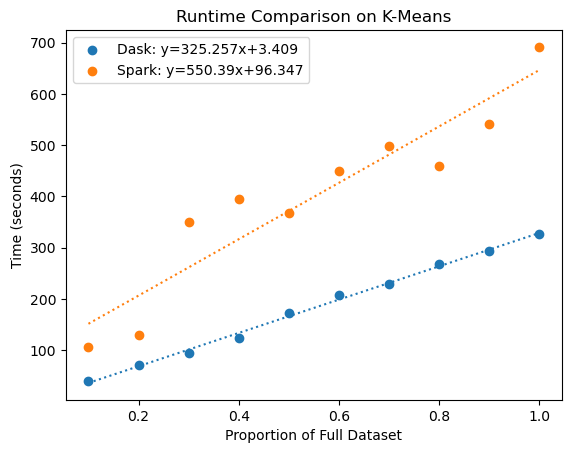

In [11]:
plt.scatter(x=dask_kmeans.index, y=dask_kmeans['Time'], label=f'Dask: y={dask_kmeans_slope}x+{dask_kmeans_intercept}')
plt.scatter(x=spark_kmeans.index, y=spark_kmeans['Time'], label=f'Spark: y={spark_kmeans_slope}x+{spark_kmeans_intercept}')
plt.plot(dask_kmeans.index, reg_equation(dask_kmeans.index.values,
                                         dask_kmeans_slope,
                                         dask_kmeans_intercept),
                                         linestyle='dotted')
plt.plot(spark_kmeans.index, reg_equation(spark_kmeans.index.values,
                                         spark_kmeans_slope,
                                         spark_kmeans_intercept),
                                         linestyle='dotted')
plt.legend()
plt.title('Runtime Comparison on K-Means')
plt.xlabel('Proportion of Full Dataset')
plt.ylabel('Time (seconds)')

## Linreg Regression

In [12]:
# Fit models
dask_linreg_reg = LinearRegression().fit(np.array(dask_linreg.index).reshape(-1, 1),
                                         np.array(dask_linreg['Time']).reshape(-1,1))

spark_linreg_reg = LinearRegression().fit(np.array(spark_linreg.index).reshape(-1, 1),
                                         np.array(spark_linreg['Time']).reshape(-1,1))

# Extract equations
dask_linreg_slope = np.round(dask_linreg_reg.coef_[0][0], 3)
spark_linreg_slope = np.round(spark_linreg_reg.coef_[0][0], 3)

dask_linreg_intercept = np.round(dask_linreg_reg.intercept_[0], 3)
spark_linreg_intercept = np.round(spark_linreg_reg.intercept_[0], 3)

# R^2
dask_linreg_det = dask_linreg_reg.score(np.array(dask_linreg.index).reshape(-1, 1),
                                         np.array(dask_linreg['Time']).reshape(-1,1))

spark_linreg_det = spark_linreg_reg.score(np.array(spark_linreg.index).reshape(-1, 1),
                                         np.array(spark_linreg['Time']).reshape(-1,1))

In [13]:
print(f'Dask Linreg R^2: {dask_linreg_det}')
print(f'Spark Linreg R^2: {spark_linreg_det}')

Dask Linreg R^2: 0.9955528195947582
Spark Linreg R^2: 0.955906756635816


## Linreg Plot

Text(0, 0.5, 'Time (seconds)')

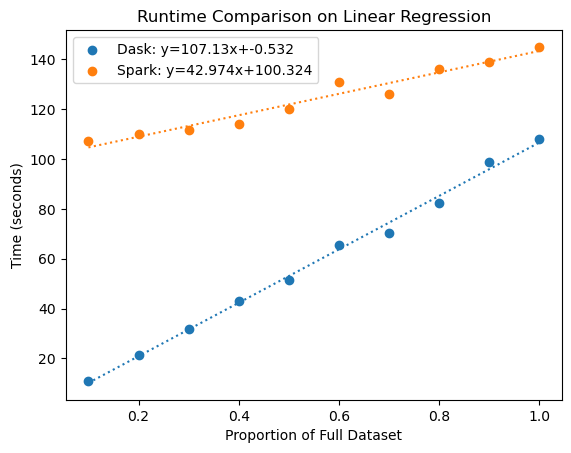

In [14]:
plt.scatter(x=dask_linreg.index, y=dask_linreg['Time'], label=f'Dask: y={dask_linreg_slope}x+{dask_linreg_intercept}')
plt.scatter(x=spark_linreg.index, y=spark_linreg['Time'], label=f'Spark: y={spark_linreg_slope}x+{spark_linreg_intercept}')
plt.plot(dask_linreg.index, reg_equation(dask_linreg.index.values,
                                         dask_linreg_slope,
                                         dask_linreg_intercept),
                                         linestyle='dotted')
plt.plot(spark_linreg.index, reg_equation(spark_linreg.index.values,
                                         spark_linreg_slope,
                                         spark_linreg_intercept),
                                         linestyle='dotted')
plt.legend()
plt.title('Runtime Comparison on Linear Regression')
plt.xlabel('Proportion of Full Dataset')
plt.ylabel('Time (seconds)')

## Logreg Regression

In [15]:
# Fit models
dask_logreg_reg = LinearRegression().fit(np.array(dask_logreg.index).reshape(-1, 1),
                                         np.array(dask_logreg['Time']).reshape(-1,1))

spark_logreg_reg = LinearRegression().fit(np.array(spark_logreg.index).reshape(-1, 1),
                                         np.array(spark_logreg['Time']).reshape(-1,1))

# Extract equations
dask_logreg_slope = np.round(dask_logreg_reg.coef_[0][0], 3)
spark_logreg_slope = np.round(spark_logreg_reg.coef_[0][0], 3)

dask_logreg_intercept = np.round(dask_logreg_reg.intercept_[0], 3)
spark_logreg_intercept = np.round(spark_logreg_reg.intercept_[0], 3)

# R^2
dask_logreg_det = dask_logreg_reg.score(np.array(dask_logreg.index).reshape(-1, 1),
                                         np.array(dask_logreg['Time']).reshape(-1,1))

spark_logreg_det = spark_logreg_reg.score(np.array(spark_logreg.index).reshape(-1, 1),
                                         np.array(spark_logreg['Time']).reshape(-1,1))

In [16]:
print(f'Dask Logreg R^2: {dask_logreg_det}')
print(f'Spark Logreg R^2: {spark_logreg_det}')

Dask Logreg R^2: 0.9713907553823582
Spark Logreg R^2: 0.9866691051873218


## Logreg Plot

Text(0, 0.5, 'Time (seconds)')

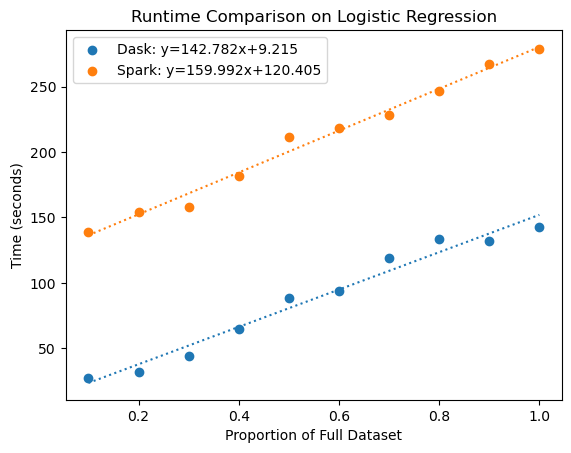

In [17]:
plt.scatter(x=dask_logreg.index, y=dask_logreg['Time'], label=f'Dask: y={dask_logreg_slope}x+{dask_logreg_intercept}')
plt.scatter(x=spark_logreg.index, y=spark_logreg['Time'], label=f'Spark: y={spark_logreg_slope}x+{spark_logreg_intercept}')
plt.plot(dask_logreg.index, reg_equation(dask_logreg.index.values,
                                         dask_logreg_slope,
                                         dask_logreg_intercept),
                                         linestyle='dotted')
plt.plot(spark_logreg.index, reg_equation(spark_logreg.index.values,
                                         spark_logreg_slope,
                                         spark_logreg_intercept),
                                         linestyle='dotted')
plt.legend()
plt.title('Runtime Comparison on Logistic Regression')
plt.xlabel('Proportion of Full Dataset')
plt.ylabel('Time (seconds)')